In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### ler csv, formatar dados, passar todos os tempos pra ms, fazer boxplots

In [2]:
def get_time(timeit):
    mean = timeit.split(' ')[0]
    unit = timeit.split(' ')[1]
    if unit == 's':
         return float(mean)*1000
    return float(mean)

def get_std_dev(timeit):
    std_dev = timeit.split(' ')[3]
    unit = timeit.split(' ')[4]
    if unit == 'µs':
         return float(std_dev)/1000
    return float(std_dev)

def get_time_costly(timeit):
    time_in_sec = 0
    time = timeit.split('±')[0]
    for unit in time.split(' '):
        if unit == '':
            continue
        if unit[-1] == 'h':
            time_in_sec += float(unit[:-1]) * 60 * 60
        elif unit[-1] == 'n':
            time_in_sec += float(unit[:-3]) * 60
        elif unit[-1] == 's':
            time_in_sec += float(unit[:-1])
    return time_in_sec

In [3]:
def treat_results(file_name):
    results = pd.read_csv(file_name, sep=';', header=None)
    results.columns = ['file name', 'representation', 'timeit']
    results['time (ms)'] = results['timeit'].apply(get_time)
    results['std dev (ms)'] = results['timeit'].apply(get_std_dev)
    return results.drop(['timeit'], axis=1)

def treat_results_costly(file_name):
    results = pd.read_csv(file_name, sep=';', header=None)
    results.columns = ['file name', 'representation', 'timeit']
    results['time (s)'] = results['timeit'].apply(get_time_costly)
    return results.drop(['timeit'], axis=1)

In [4]:
results = treat_results('./results_512.csv')

In [5]:
results.head()

,file name,representation,time (ms),std dev (ms)
0,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,STFT,39.7,2.04
1,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,CQT,523.0,25.20
2,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,SWGM,120.0,3.71
3,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,economic 200,1010.0,24.40
4,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,economic 500,935.0,10.50


o que queremos: botar tudo numa mesma tabela, com colunas [file name, representation, resolution, time, std dev]
depois fazer groupby resolution, e fazer o boxplot

In [6]:
all_results = pd.DataFrame(columns=['file name', 'representation', 'resolution', 'time (ms)', 'std dev (ms)'])

for res in [512, 1024, 2048, 4096, 8192, 16384, 32768]:
    file = 'results_' + str(res) + '.csv'
    results = treat_results(file)
    results['resolution'] = res
    all_results = all_results.append(results)

In [7]:
all_results_costly = pd.DataFrame(columns=['file name', 'representation', 'resolution', 'time (s)'])

for res in [512, 1024, 2048, 4096, 8192, 16384]:
    file = 'results_costly' + str(res) + '.csv'
    results = treat_results_costly(file)
    results['resolution'] = res
    all_results_costly = all_results_costly.append(results)

In [8]:
all_results.to_csv('all_results_treated.csv')
all_results_costly.to_csv('all_results_costly_treated.csv')

Groupby representation and make boxplots

In [9]:
cqt = all_results[all_results['representation'] == 'CQT']
cqt = cqt.drop('std dev (ms)', axis=1)

<Figure size 720x720 with 0 Axes>

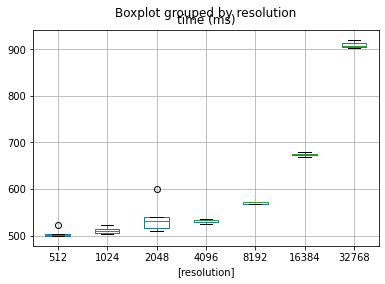

In [10]:
plt.figure(figsize=[10,10])
cqt.boxplot(by='resolution')

In [11]:
our = all_results[all_results['representation'] == 'economic 500']
our = our.drop('std dev (ms)', axis=1)

<Figure size 720x720 with 0 Axes>

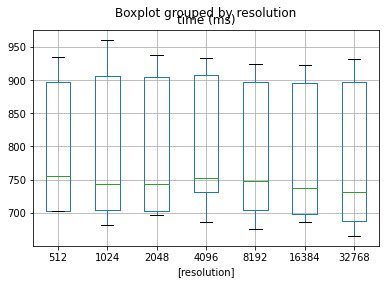

In [12]:
plt.figure(figsize=[10,10])
our.boxplot(by='resolution')

In [13]:
our = all_results[all_results['representation'] == 'economic 500']
our = our.drop('std dev (ms)', axis=1)

swgm = all_results[all_results['representation'] == 'SWGM']
swgm = swgm.drop('std dev (ms)', axis=1)

stft = all_results[all_results['representation'] == 'STFT']
stft = stft.drop('std dev (ms)', axis=1)

cqt = all_results[all_results['representation'] == 'CQT']
cqt = cqt.drop('std dev (ms)', axis=1)

/Users/nicolas/Library/Python/3.7/lib/python/site-packages/pandas/plotting/_matplotlib/boxplot.py:375: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds,
/Users/nicolas/Library/Python/3.7/lib/python/site-packages/pandas/plotting/_matplotlib/boxplot.py:375: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds,
/Users/nicolas/Library/Python/3.7/lib/python/site-packages/pandas/plotting/_matplotlib/boxplot.py:375: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds,


<Figure size 720x720 with 0 Axes>

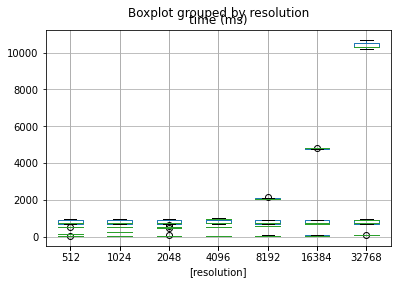

In [14]:
plt.figure(figsize=[10,10])
ax = swgm.boxplot(by='resolution', return_type='axes')
ax = our.boxplot(by='resolution', ax=ax)
ax = cqt.boxplot(by='resolution', ax=ax)
ax = stft.boxplot(by='resolution', ax=ax)

In [15]:
our = all_results[all_results['representation'] == 'economic 500']
our = our.drop('std dev (ms)', axis=1)
our = our.groupby(['resolution']).mean()

swgm = all_results[all_results['representation'] == 'SWGM']
swgm = swgm.drop('std dev (ms)', axis=1)
swgm = swgm.groupby(['resolution']).mean()

stft = all_results[all_results['representation'] == 'STFT']
stft = stft.drop('std dev (ms)', axis=1)
stft = stft.groupby(['resolution']).mean()

cqt = all_results[all_results['representation'] == 'CQT']
cqt = cqt.drop('std dev (ms)', axis=1)
cqt = cqt.groupby(['resolution']).mean()

In [16]:
resolutions = [512, 1024, 2048, 4096, 8192, 16384, 32768]

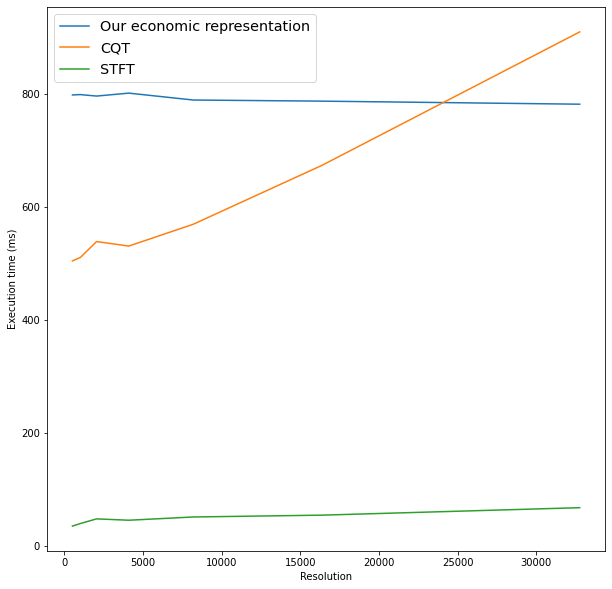

In [17]:
plt.figure(figsize=[10,10])
plt.plot(resolutions, our, label='Our economic representation')
plt.plot(resolutions, cqt, label='CQT')
# plt.plot(resolutions, swgm, label='SWGM')
plt.plot(resolutions, stft, label='STFT')

plt.xlabel('Resolution')
plt.ylabel('Execution time (ms)')

plt.legend(fontsize='x-large')

In [18]:
resolutions = resolutions[:-1]
lt = all_results_costly[all_results_costly['representation'] == 'LT']['time (s)']
sls = all_results_costly[all_results_costly['representation'] == 'SLS']['time (s)']

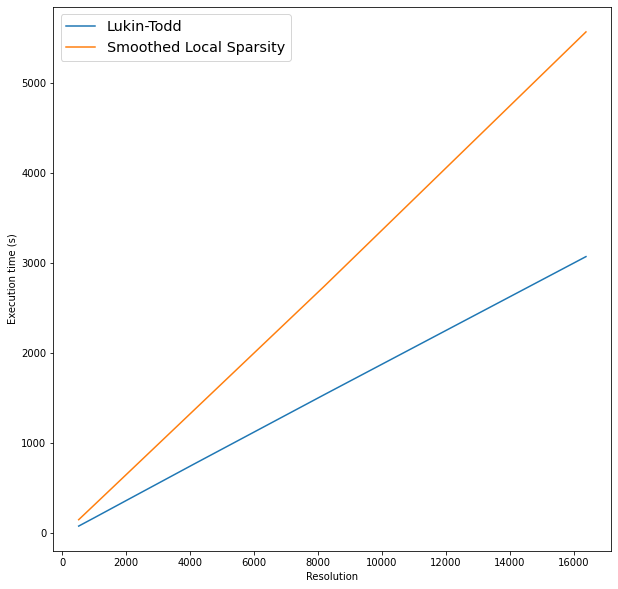

In [19]:
plt.figure(figsize=[10,10])
plt.plot(resolutions, lt, label='Lukin-Todd')
plt.plot(resolutions, sls, label='Smoothed Local Sparsity')

plt.xlabel('Resolution')
plt.ylabel('Execution time (s)')

plt.legend(fontsize='x-large')

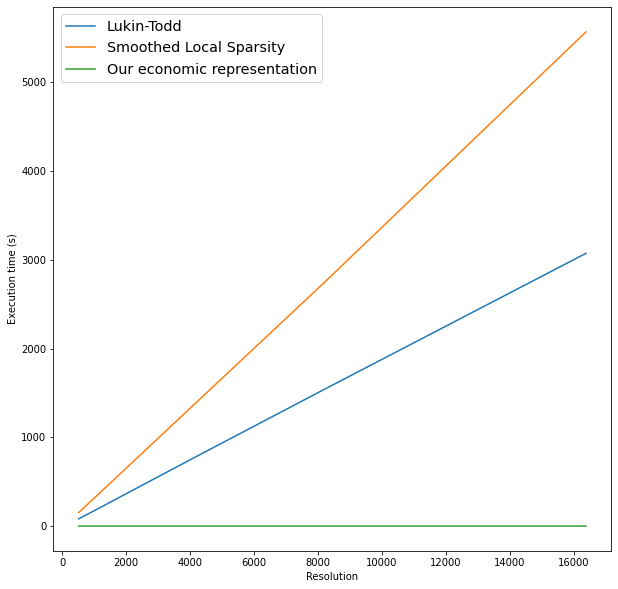

In [20]:
plt.figure(figsize=[10,10])
plt.plot(resolutions, lt, label='Lukin-Todd')
plt.plot(resolutions, sls, label='Smoothed Local Sparsity')
plt.plot(resolutions, our[:-1] / 1000, label='Our economic representation')

plt.xlabel('Resolution')
plt.ylabel('Execution time (s)')

plt.legend(fontsize='x-large')